<a href="https://colab.research.google.com/github/Manishkatel/Tax_Payer_PoliticalParty_Model/blob/main/Taxpayer's_Political_Party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content**
A tax is a compulsory financial charge or some other type of levy imposed on a taxpayer (an individual or legal entity) by a governmental organization in order to fund government spending and various public expenditures.

# **Objective**
 To build a machine learning model that would predict the political party to which a taxpayer belongs to.

# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
%matplotlib inline

In [ ]:
tax_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


# **Data Analysis**

```
# This is formatted as code
```



In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
tax_data.shape

(803, 11)

In [ ]:
tax_data['PoliticalParty'].value_counts()

,count
PoliticalParty,
Democrat,269
Independent,269
Republican,265


In [ ]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


<Axes: xlabel='count', ylabel='PoliticalParty'>

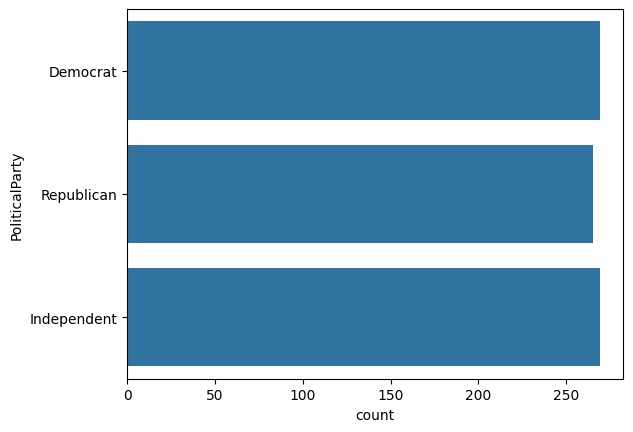

In [ ]:
sns.countplot(tax_data.PoliticalParty)

**Doesn't Seem Class Imbalance Problem, So we just move on.**

# **Splitting data into independent and dependent variables**

In [ ]:
X = tax_data.drop('PoliticalParty',axis=1)
x = X.drop('Unnamed: 0',axis=1)
y = tax_data.PoliticalParty
x.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,183414,-12402,1,2,28,1,0,0,1
1,129786,700251,2,5,63,3,0,0,0
2,268343,493411,2,4,44,1,1,0,1
3,290506,-433408,1,1,28,5,1,0,1
4,90108,907135,1,3,57,5,1,1,0


# **Tranferring the Purchase column from categorical to numeric**

In [ ]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Training the data**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

# **Model_Evaluation_Train Data**

In [ ]:
y_train_pred = model.predict(x_train)
from sklearn.metrics import accuracy_score,f1_score
#train
print(accuracy_score(y_train,y_train_pred)*100)
print(f1_score(y_train,y_train_pred,average = "micro")*100)

86.29283489096574
86.29283489096574


**It is a good accuracy_score and f1_score. So, no need for hyperparameter tuning**

# **Reading the test data**

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


# **Test Data Analysis and Prediction**

In [ ]:
test_data = test_data.drop(["Unnamed: 0"],axis=1)

In [ ]:
y_pred = model.predict(test_data)
y_pred = label_encoder.inverse_transform(y_pred)
result_df = pd.DataFrame()
result_df['prediction'] = y_pred

result_df.reset_index(drop=True, inplace=True)
result_df.to_csv('sample_submission.csv', index = False)